# Štatistická práca
Patrik Broček

## Úvod

V mojej štatistickej práci budem analyzovať dáta o nakupovaní v supermarketoch získané z : https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset. Dáta však **nie sú plne realistické**, pretože pre každý jednotlivý **nákup** je v datasete uvedená iba **jedna zakúpená položka**, jej množstvo a cena. Z tohto dôvodu budem celý čas uvažovať len svet v ktorom sa dá v obchode kúpiť iba jedna položka a všetky závery ktoré odvodím budú platné len v pod touto podmienkou.


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from prettytable import PrettyTable

data = pd.read_csv("dataset/supermarket/archive/customer_shopping_data_parsed.csv")
print(data.head())

   gender  age   category payment_method     total
0  Female   28   Clothing           Card   7502.00
1    Male   21      Shoes           Card   5401.53
2    Male   20   Clothing           Cash    300.08
3  Female   66      Shoes           Card  15004.25
4  Female   49  Cosmetics           Cash     40.66


## Ženy míňajú na nákupoch viac ako muži

Skúsim zistiť, či podľa mojich dát platí predsudok, že ženy nakupujú (v mojom prípade utrácajú) viac ako muži. V datasete mám dáta o pohlaví nakupujúcich a aj celkovú utratenú sumu. Vykonám test, ktorým zistím, či sú útraty žien inak rozdelené ako mužské a vyvodím záver.

In [143]:
males = data[data["gender"] == "Male"]
females = data[data["gender"] == "Female"]

+---------+--------+--------+-----+-------+-------+--------+---------+--------+
|  count  |  mean  |  std   | min |  25%  |  50%  |  75%   |   max   | gender |
+---------+--------+--------+-----+-------+-------+--------+---------+--------+
| 39975.0 | 2534.1 | 4216.4 | 5.2 | 130.8 | 600.2 | 2700.7 | 26250.0 |  male  |
| 39975.0 | 2498.8 | 4187.4 | 5.2 | 130.8 | 600.2 | 2700.7 | 26250.0 | female |
+---------+--------+--------+-----+-------+-------+--------+---------+--------+


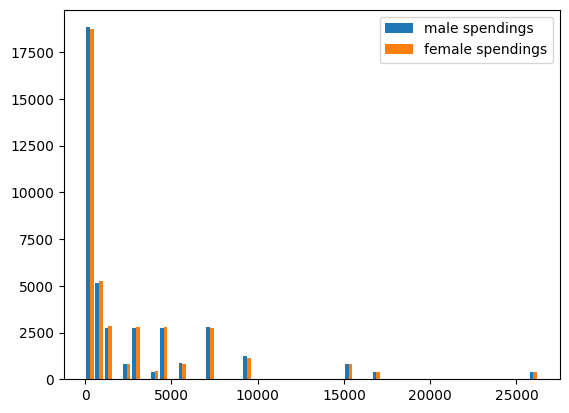

In [144]:
# Graph
bins = np.linspace(data["total"].min(), data["total"].max(), 50)
plt.hist([males["total"], females["total"]], bins, label=["male spendings", "female spendings"])
plt.legend(loc='upper right'); plt.title("Total spending histogram"); plt.xlabel("Total spendings"); plt.ylabel("Count")

# Table
table = PrettyTable(); table.field_names = males["total"].describe().index
table.add_row(males["total"].describe().values.round(1))
table.add_row(females["total"].describe().values.round(1))
table.add_column("gender", ["male", "female"])
print(table)

Z histogramu a aj z tabuľky to zatiaľ vyzerá, že by sme hypotézu mohli ľahko vyvrátiť. Zároveň však histogram vyzerá tak, že hodnoty celkovej utratenej sumy nie sú normálne distribuované. Toto ešte overím : <br>

$ H_0 $  Dáta sú normálne distribuované <br>
$ H_1 $  Dáta nie sú normálne distribuované <br>
$ \alpha = 0.05 $  

In [145]:
_, p = stats.normaltest(data["total"])
print("p value is : ", p)

p value is :  0.0


$ p $ hodnota je oveľa menšia ako $ \alpha $ takže nulovú hypotézu môžem zamietnuť. Dáta teda nie sú normálne rozdelené a tak budem používať neparametrický test.

Aby som zistil, či dáta pre mužov a ženy pochádzajú z rovnakého rozdelenia, vykonám [U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) a median test. Pre oba testy mi budú platiť nasledovné hypotézy : <br>

$ H_0 $ : Muži a ženy utrácajú v obchode rovnako <br>
$ H_1 $ : Ženy utrácajú v obchode viac <br>
$ \alpha = 0.05 $

### [U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [146]:
_, p_value = stats.mannwhitneyu(males["total"], females["total"])
print("p_value: ", p_value.round(4))

p_value:  0.6379


$ p $ hodnota je podľa očakávania vyššia ako $ \alpha $ a tak nulovú hypotézu zamietnuť nemôžem.

### [Median test](https://en.wikipedia.org/wiki/Median_test)

Podľa očakávania je $ p $ hodnota vyššia ako požadovaná $ \alpha $ hodnota a tak nemôžem zamietnuť nulovú hypotézu. Týmto som zistil, že dáta útrat mužov a žien pravdepodobne pochádzajú z rovnakej distribúcie. Skúsim vykonať ešte mediánový test, ktorým zistím, či pochádzajú z distribúcií s rovnakým mediánom.

In [147]:
result = stats.median_test(males["total"], females["total"])
print("p value is : ", result.pvalue.round(4))

p value is :  0.7182


Aj podľa tohto testu nemôžeme zamietnuť nulovú hypotézu a teda môžem vyvodiť záver, že muží aj ženy utrácajú v obchode rovnako.

# Mladí ľudia nakupujú kartou viac ako starší

V tejto hypotéze skúsim overiť, či existuje závislosť medzi medzi vekom a spôsobom platby. Konkrétne sa domnievam, že mladí ľudia používajú kartu viac ako starší ľudia. Vek mám v dátach zastúpený takmer uniformne a tak ďalej dáta nebudem spracúvať.

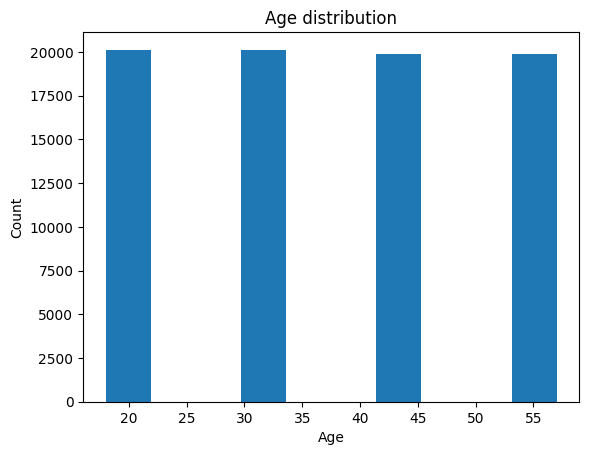

In [153]:
plt.hist(data["age"])
plt.title("Age distribution"); plt.xlabel("Age"); plt.ylabel("Count")
plt.show()

+---------+-------+-------+------+------+------+------+------+----------------+
|  count  |  mean |  std  | min  | 25%  | 50%  | 75%  | max  | payment_method |
+---------+-------+-------+------+------+------+------+------+----------------+
| 44144.0 | 37.44 | 14.52 | 18.0 | 18.0 | 31.0 | 44.0 | 57.0 |      card      |
| 35806.0 |  37.4 | 14.55 | 18.0 | 18.0 | 31.0 | 44.0 | 57.0 |      cash      |
+---------+-------+-------+------+------+------+------+------+----------------+


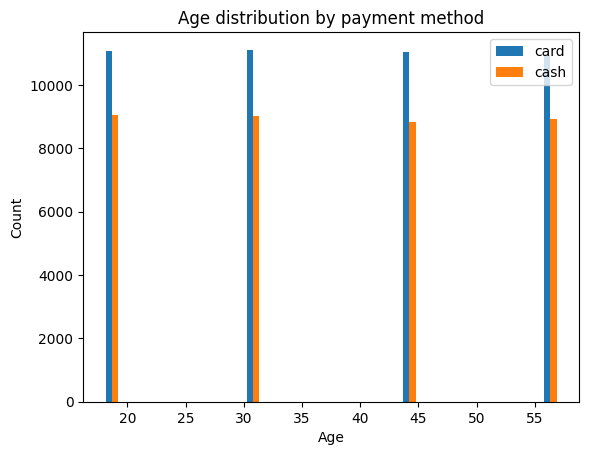

In [155]:
card = data[data["payment_method"] == "Card"]
cash = data[data["payment_method"] == "Cash"]

# Table
table = PrettyTable(); table.field_names = card["age"].describe().index
table.add_row(card["age"].describe().values.round(2))
table.add_row(cash["age"].describe().values.round(2))
table.add_column("payment_method", ["card", "cash"])
print(table)

# Graph
bins = np.linspace(data["age"].min(), data["age"].max(), 30)
plt.hist([card["age"], cash["age"]], bins, label=["card", "cash"]); plt.xlabel("Age"); plt.ylabel("Count")
plt.legend(loc='upper right'); plt.title("Age distribution by payment method")
plt.show()

Z dát je jasne vidno, že platba kartou je populárnejšia ako platba v hotovosti, avšak okrem toho vyzerjú byť dáta rozdelené takmer identicky. Histogram vyzerá tak, že by sme aj túto domnienku mali zamietnuť, pretože pre každú vekovú skupinu je platba kartou nepopulárna o takmer rovnakú hodnotu, teda rozdelenie platieb kartou je len posunuté oproti platbám v hotovosti.

### Chi-kvadrát
Aby som zistil, či sú dáta na sebe skutočne závislé použijem chi-kvadrát test nezávislosti. Ten porovnáva na základe početnosti a tak si dáta najskôr kategorizujem do skupín.


Nulová hypotéza $  H_0 $ : Neexistuje závislosť medzi vekom a spôsobom platby (mladí nakupujú kartou rovnako veľa ako starší) <br>
$ H_1 $ : Existuje závislosť medzi vekom a spôsobom platby <br>
$ \alpha = 0.05 $ <br>


In [150]:
from ages import categorize_ages

categories = ["young", "young middle", "old middle" ,"old"] # 4 categories
interval = np.linspace(data["age"].min(), data["age"].max(), len(categories) + 1) # 4 intervals means 5 interval points
categorized_data = categorize_ages(interval, data)

In [151]:
crosstab = pd.crosstab(categorized_data["payment_method"], categorized_data["age"])
crosstab # ages are in 4 categories, each column corresponds to interval from its value to the next value. Last interval goes to infinity

age,18,31,44,57
payment_method,,,,
Card,11057,11109,11036,10942
Cash,9044,9018,8823,8921


In [152]:
output = stats.chi2_contingency(crosstab)
print("p value is : ", output.pvalue.round(4))

p value is :  0.6805


$ p $ hodnota je väčšia ako $ \alpha $ a teda nemôžem zamietnuť nulovú hypotézu. Výsledkom je, neexistuje závislosť medzi vekom a spôsobom platby a teda mladí používajú kartu rovnako veľa ako starší.

# Záver

Na základe mojich dát a počiatočnej podmienky sa mi podarilo vyvodiť, že muži a ženy utrácajú v obchode rovnako. Ďalej som skúmal, či starší ľudia platia viac v hotovosti, čo sa mi podarilo zamietnuť.